<a href="https://colab.research.google.com/github/priyankapri/MARS_MSEEL/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import dataset**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import random
import seaborn as sns
from sklearn.datasets import make_classification as mk
from scipy.stats import truncnorm
!pip install wget 

import wget
wget.download('https://raw.githubusercontent.com/BorisMuzellec/MissingDataOT/master/utils.py')
from utils import *
random.seed(123456)


In [ ]:
data1 = pd.read_csv ('EDA_test.csv')

Lets have first look of the data

In [ ]:
data1

,ID,Severity,Disease Stage,Death,Age,Gender,Race,Diabetes,CHF,Biomarker2,Biomarker1
0,1,3,1,0,62,1,2,2,2,1.178655,3.25
1,2,3,0,0,33,2,1,1,1,NaN,NaN
2,3,2,2,0,47,1,1,2,2,NaN,NaN
3,4,1,3,0,30,1,1,1,1,0.457425,1.58
4,5,1,3,0,48,2,1,2,1,0.336472,1.40
...,...,...,...,...,...,...,...,...,...,...,...
95,96,2,0,1,83,2,1,2,2,NaN,NaN
96,97,3,0,0,36,2,1,2,1,NaN,NaN
97,98,3,1,0,55,1,1,1,1,NaN,NaN
98,99,3,0,0,63,1,3,2,2,0.463734,1.59


**First look of the data tells that**: Severity, disease stage, death, gender, race, diabetes, CHF are categorical variables while Age, Biomarker 1 & 2 are continous variable. From summary, there seems to be missing data values in Biomarker field. Also, dataset dimesions as 100 rows with 11 columns.

**Very first glance should contain at least the following:**
1. **Data type**: Idea is to change the datatype as required. 

2. **Univariate Analysis/Summary statistics (Raw data)**: Observe mean, median, range, Idea is to quick data validation, value plausibility and outlier detection. For this step, categorical and continous variable should be observed different as some statistics such as mean for categorical variable wont make much sense compared to continous data. 
Further, grouping by outcome will help us undertand data in more depth thereby increasing precision in statistical inference.

3. **Missingness**: Three type of missingness

      1.   MCAR: Missinhg completle at random
      2.   MAR:  Missing at random
      3.   MNAR : Missing not at random

4. **Collinearity**: Idea is to check given variable relationship among themselves and outcome. This step will be helpful at the time of variable selection during model development.     


**1. Data type**

In [ ]:
dict(data1.dtypes)

{'Age': dtype('int64'),
 'Biomarker1': dtype('float64'),
 'Biomarker2': dtype('float64'),
 'CHF': dtype('int64'),
 'Death': dtype('int64'),
 'Diabetes': dtype('int64'),
 'Disease Stage': dtype('int64'),
 'Gender': dtype('int64'),
 'ID': dtype('int64'),
 'Race': dtype('int64'),
 'Severity': dtype('int64')}

In [ ]:
data1['Age'] = data1['Age'].astype(float)
data1.info()
categorical_data= data1.select_dtypes(include='int64')
cont_data= data1.select_dtypes(include='float64')
categorical_data=categorical_data.drop(columns='ID')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             100 non-null    int64  
 1   Severity       100 non-null    int64  
 2   Disease Stage  100 non-null    int64  
 3   Death          100 non-null    int64  
 4   Age            100 non-null    float64
 5   Gender         100 non-null    int64  
 6   Race           100 non-null    int64  
 7   Diabetes       100 non-null    int64  
 8   CHF            100 non-null    int64  
 9   Biomarker2     55 non-null     float64
 10  Biomarker1     55 non-null     float64
dtypes: float64(3), int64(8)
memory usage: 8.7 KB


*We can observe that except biomarker 1& 2 and age (which was converted to float to have consistency accross numeric data, all variables are of type integer. Biomarker 1&2 have about 45% data missing in this dataset*

**2. Univariate Analysis/Summary statistics**

With experience, one would often do this step simultaneously. For the sake of this tutorial, I will categorize this into two :

1.   Continous parameters
2.   Categorical parameters



In [ ]:
cont_data.describe()

,Age,Biomarker2,Biomarker1
count,100.00000,55.000000,55.000000
mean,58.74000,0.762899,2.814909
std,14.07241,0.621207,3.536809
min,30.00000,0.009950,1.010000
25%,48.00000,0.405465,1.500000
50%,58.00000,0.553885,1.740000
75%,67.50000,1.064115,2.900000
max,90.00000,3.259250,26.030000


*As observed, 45% missingness is present in biomarker 1 &2. On average, age is 58 years that range from 30-90 years. Since mean & median (50%)is almost similar, we can expect age data to be normally distributed in the dataset. This is important as many model assumes normal distribution. Also, 75% data lies below 67 years, meaning people in this dataset likely to be free from additional fraility risk factors that naturally increases with age specifically above 70 .*

*For biomarker1, due to difference between mean and median, we would expect data to be considerably skewed to the left. In addition, we expect data to have less spread, so far from normal. In comparison, biomarker2 data will more spread but non-normal.*

*In both biomarkers, max point is further out and considerable amount of data (75%) lies well below max point, we can expect outliers in the data beyond third quartiles*

Most often we would have many predictors and ploting  each could be difficult and/or unnecessary task. These summary statistics comes handy at that time. However, once can further explore these distributions by distribution plots etc.

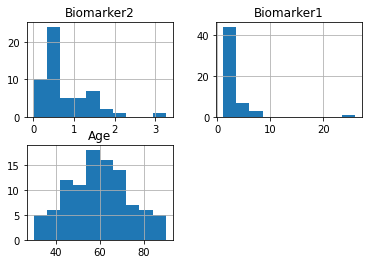

In [ ]:
data1.hist(['Biomarker2','Biomarker1','Age'])
plt.show()

Conclusions drawn from summary statistics can now be visualized. One point to note here that mean might not make much sense in Biomarker data due to presenece of outliers that inflate/deflate the mean assessment. In here, median is more likley to be looked at. 

**Catgeorical Data Summary Statistics**

In [ ]:
from tabulate import tabulate

namelabel = {"Gender":     {2: "Female", 1:"Male"},
                "Race": {1: "White", 2:"AfricanAmerican", 3: "Other"},
             "CHF":{2:"Yes",1:"No"},
            "Diabetes":{2:"Yes",1:"No"} }

categorical_data = categorical_data.replace(namelabel)
categorical_data.head()               

,Severity,Disease Stage,Death,Gender,Race,Diabetes,CHF
0,3,1,0,Male,AfricanAmerican,Yes,Yes
1,3,0,0,Female,White,No,No
2,2,2,0,Male,White,Yes,Yes
3,1,3,0,Male,White,No,No
4,1,3,0,Female,White,Yes,No


In [ ]:
def my_function(categoricaldata):
  for x in categoricaldata:
    dfcat = (data1[x].value_counts()/data1[x].value_counts().sum()*100)
    print(dfcat)

my_function(categorical_data)

2    36.0
1    34.0
3    30.0
Name: Severity, dtype: float64
0    58.0
2    17.0
1    14.0
3    11.0
Name: Disease Stage, dtype: float64
0    89.0
1    11.0
Name: Death, dtype: float64
2    53.0
1    47.0
Name: Gender, dtype: float64
1    68.0
2    24.0
3     8.0
Name: Race, dtype: float64
1    65.0
2    35.0
Name: Diabetes, dtype: float64
2    57.0
1    43.0
Name: CHF, dtype: float64


Above represent proportion of patients for each categorical variable in the dataset. It shows, highest severity grade level 2 is present in about 36% followed by grade1 as 34%. If grade3 being severe, we can say that in the entire population, about 70% data has no to moderate severeity or only 30% are severly ill. 

For staging, 3 being highest, we can say that stage 2&3 exists in about 28% in total while 72% have no or mild form of disease.Therefore, probability of finding a diseased in this dataset is less than 30%. 

11% of total cohort died, 53% (gender=2) are female while males represents about 47% in the dataset. It tells us we might have to include risk fators in the model that might be associated with gender. Further if we look death stratified by gender could give us hint about which gender had more outcome such as death. In other words, in this data the disease studied could put particular gender at risk. A very raw assessment of "At-risk population". Similarly, for race 1 being White,data predominanty will assess likely factors associated with white population therefore, model might be more applicable in white population.

Regarding diseases such as Diabetes, Chronic heart failure (CHF) about 35% ,57% had the disease. In essence, probability of finding a patient with CHF is likely more than 50%. Further, cross tabulating disease condition, likely give you clue regarding sicker population likely having both diabetes and CHF. More sick is the person, higher is chance of death compared to single or no condition in the dataset.


These finding further substantiated if summary statistics are calculated stratfied by outcome or any othe predictor of choice to have better interpretability. These steps are important to understand and many questions at this point can be asked. Such as:

*   Does data represents the true sample from population? For example, if high rate of people with CHF is expected or if CHF is indeed a major risk factor in this population? If this is true, then it becomes important to include CHF as primary predictor during model development process and change derived variable accordingly.

As you can observe, glimpse of the data can provide us very valuable information before even beginning the modelling process. This becomes important when we are developing models for inferential as well as predictive analytics.

**Missingness**

Handling missing data could be a daunting process which may or may not lead to spurious association thus impacting prediction or inference at the time of model development. Broadly, missing data is classified into three:
- Missing Completely At Random (MCAR) : No relationship is observed with missing/avaiable data. In other words, random missingness.
- Missing Not At Random (MNAR): Relationship can be identified for example if one is missing and another is present
- Missing At Random (MAR) : Systemic relationship exists regarding data missingness and avaiable data.

The goal for this part of EDA is to reduce bias while handling uncertainly and not reducing the data.

Many approcahes exists such as dropping observations with missing data, impute mean or median, carry forward last observation, regression imputation based on relevant variables etc. Unfortunalty, all these techniques tend to decrease variability or uncertainty artifically associated with data leaving the model to perform better on chance. For this tutiorial, i will briefly touch missingness assessment using package "missingno".



In [ ]:
import missingno as msno

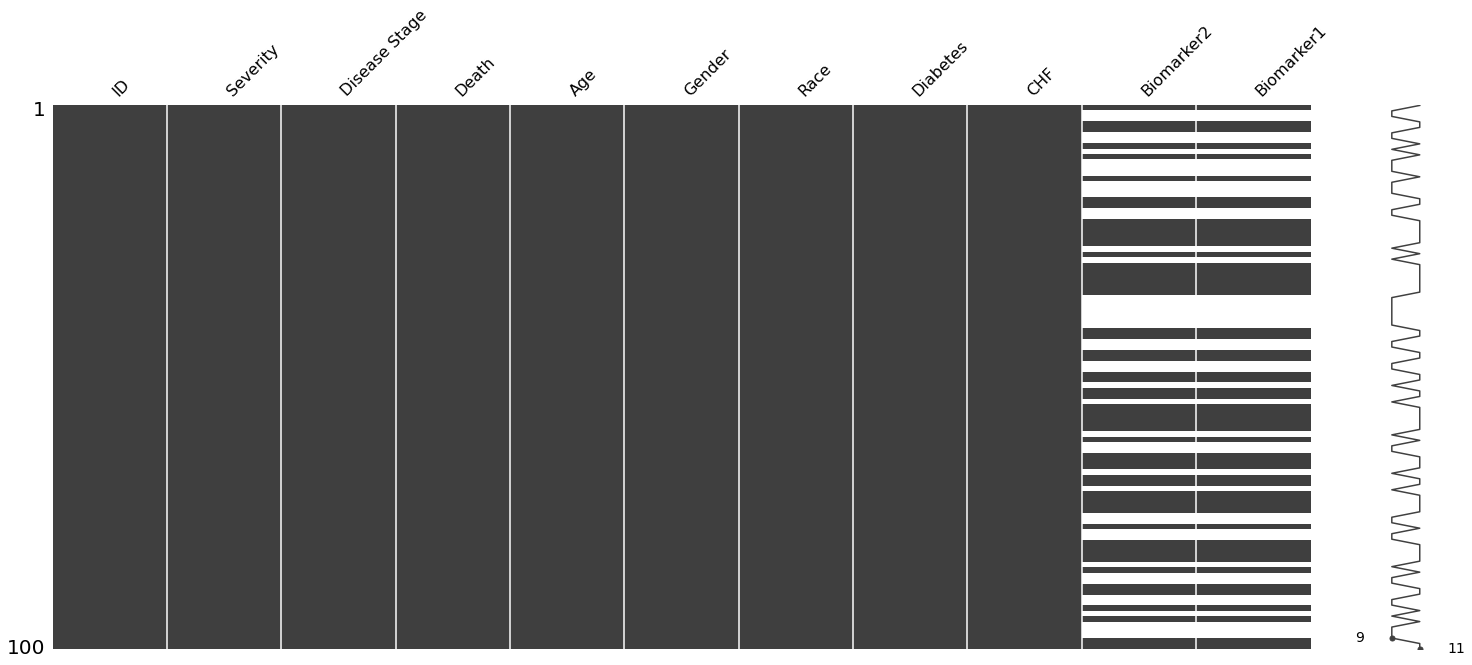

In [ ]:
msno.matrix(data1)

As observed, missingness in Biomarker 1 & 2 looks like in pairwise. That is, missingness follows. If biomarker1 is missing biomarker 2 is also missing. To handle this type of missingness and in the absence of new data acquisition/knowledge, analysis shoudl be performed two ways: one with deleting missing data (pairwise deletion) , second with using regression based interpolation and compare both the analysis.

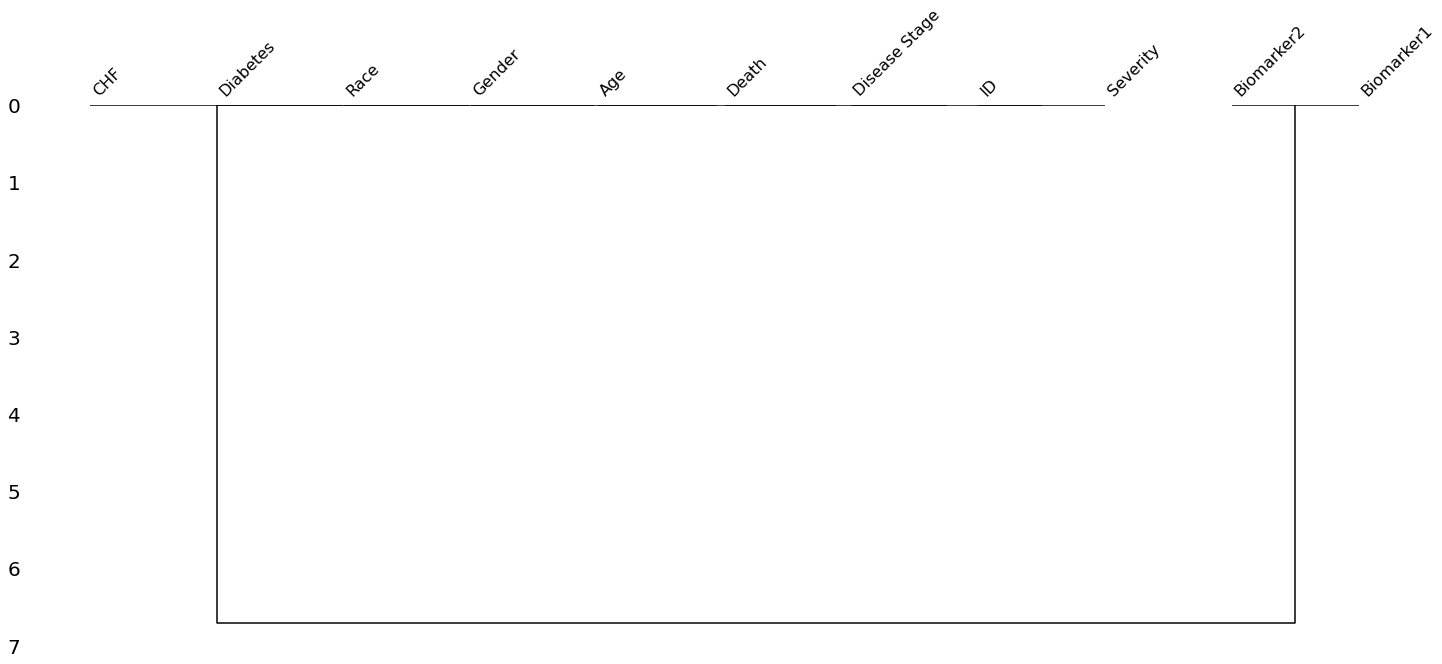

In [ ]:
msno.dendrogram(data1)

It appreas from dendrogram that biomarker 1&2 has some linkage with diabetes. To explore thsi relationship further, we ll check collinearity and assess relationship between these paramaters.

**Collinearity**

In [ ]:
matrix = data1.corr()
matrix.style.background_gradient(cmap='coolwarm', axis=1)
 


,ID,Severity,Disease Stage,Death,Age,Gender,Race,Diabetes,CHF,Biomarker2,Biomarker1
ID,1.000000,0.215054,-0.081753,0.027126,0.157752,-0.109322,0.102977,0.035952,0.074523,0.153656,0.109831
Severity,0.215054,1.000000,-0.067111,-0.302402,-0.110874,0.003009,0.170185,0.062976,-0.144603,-0.113781,-0.169847
Disease Stage,-0.081753,-0.067111,1.000000,0.062183,-0.160856,-0.129259,0.097147,-0.104419,-0.022000,0.050556,0.094266
Death,0.027126,-0.302402,0.062183,1.000000,0.376303,-0.117185,-0.171814,-0.056956,0.240794,0.211092,0.465265
Age,0.157752,-0.110874,-0.160856,0.376303,1.000000,0.024011,-0.048105,0.045070,0.283930,0.000396,0.065700
Gender,-0.109322,0.003009,-0.129259,-0.117185,0.024011,1.000000,-0.006336,-0.023104,0.031972,-0.193073,-0.179346
Race,0.102977,0.170185,0.097147,-0.171814,-0.048105,-0.006336,1.000000,0.099449,0.070262,-0.205508,-0.159421
Diabetes,0.035952,0.062976,-0.104419,-0.056956,0.045070,-0.023104,0.099449,1.000000,0.383254,0.051614,0.115934
CHF,0.074523,-0.144603,-0.022000,0.240794,0.283930,0.031972,0.070262,0.383254,1.000000,-0.048561,0.048832
Biomarker2,0.153656,-0.113781,0.050556,0.211092,0.000396,-0.193073,-0.205508,0.051614,-0.048561,1.000000,0.845241


As observed, biomarker 1 & 2 are highly correlated with correlation of ~84.5%. Another, bioamrker & death coorelation also seems to high of about 46.5%. However, corrleation with diabetes is 6% high for biomarker 1 compared to biomarker 2.

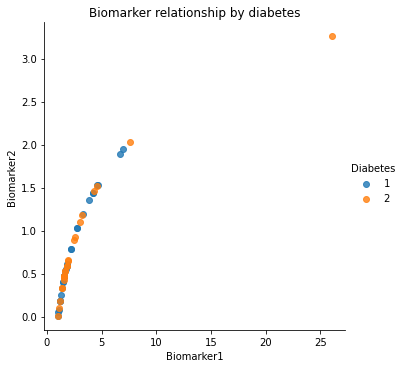

In [ ]:
sns.lmplot(x='Biomarker1', y='Biomarker2', hue='Diabetes', fit_reg=False, data=data1)
plt.title('Biomarker relationship by diabetes')
plt.show()

To explore more, scatter plot above shows a linear relationship with biomarker so regression based technique for interpolation would be appropriate under the assumption that both entities are independant. Upon stratifying with diabetes, the trend seems to follow the same.

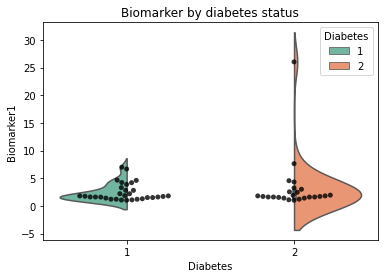

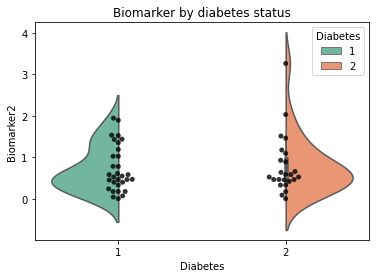

In [ ]:
sns.violinplot(y="Biomarker1", x="Diabetes", hue="Diabetes",
                    data=data1, palette="Set2",split=True)
sns.swarmplot(x="Diabetes", y="Biomarker1", color="k",data=data1, alpha=0.8)
plt.title('Biomarker by diabetes status')
plt.show()



sns.violinplot(y="Biomarker2", x="Diabetes", hue="Diabetes",
                    data=data1, palette="Set2",split=True)
sns.swarmplot(x="Diabetes", y="Biomarker2", color="k",data=data1, alpha=0.8)
plt.title('Biomarker by diabetes status')
plt.show() 

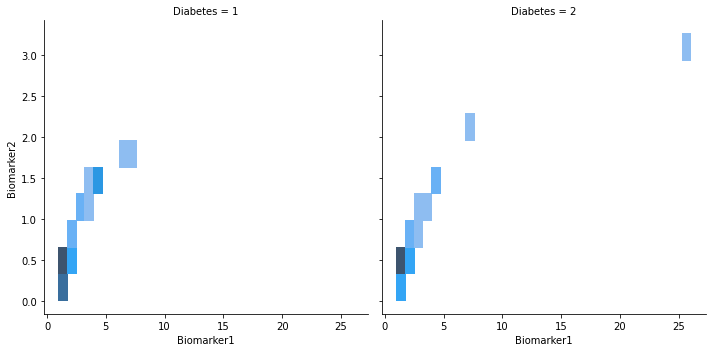

In [ ]:
sns.displot(
  data=data1,
  x="Biomarker1",
  y="Biomarker2",
  col="Diabetes"
)

Above signified that corrleation exisist more at lower ranges and outlier is present in diabetic population. It can further help us determining the validity of these values. 

Detailed EDA is building block for accurate model development.Through this tutrioal, one can go in great length to get the essence of the data, hence making predictions more accurate.

### Cheers,
### Priyanka 

